# Analysis of US Domestic Flights
**Final Project CIS 2300 - Max Shalom**


This analysis aims to explore data documenting 3.5 Million+ US Domestic Flights from 1990 to 2009. This data is courtesy of OpenFlights through [Kaggle](https://www.kaggle.com/datasets/flashgordon/usa-airport-dataset?resource=download).

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('Airports2.csv')
df = df.drop(df.columns[[11, 12, 13, 14]], axis=1)
print(df.head())

  Origin_airport Destination_airport    Origin_city Destination_city  \
0            MHK                 AMW  Manhattan, KS         Ames, IA   
1            EUG                 RDM     Eugene, OR         Bend, OR   
2            EUG                 RDM     Eugene, OR         Bend, OR   
3            EUG                 RDM     Eugene, OR         Bend, OR   
4            MFR                 RDM    Medford, OR         Bend, OR   

   Passengers  Seats  Flights  Distance    Fly_date  Origin_population  \
0        21.0   30.0      1.0     254.0  2008-10-01           122049.0   
1        41.0  396.0     22.0     103.0  1990-11-01           284093.0   
2        88.0  342.0     19.0     103.0  1990-12-01           284093.0   
3        11.0   72.0      4.0     103.0  1990-10-01           284093.0   
4         0.0   18.0      1.0     156.0  1990-02-01           147300.0   

   Destination_population  
0                 86219.0  
1                 76034.0  
2                 76034.0  
3         

As we can see, the data set has eleven columns. Using `df.drop()`, I removed four additional columns containing the longitude and latitude data of the origin and destination airports. `df.head()` shows us these columns and the first four rows of data.

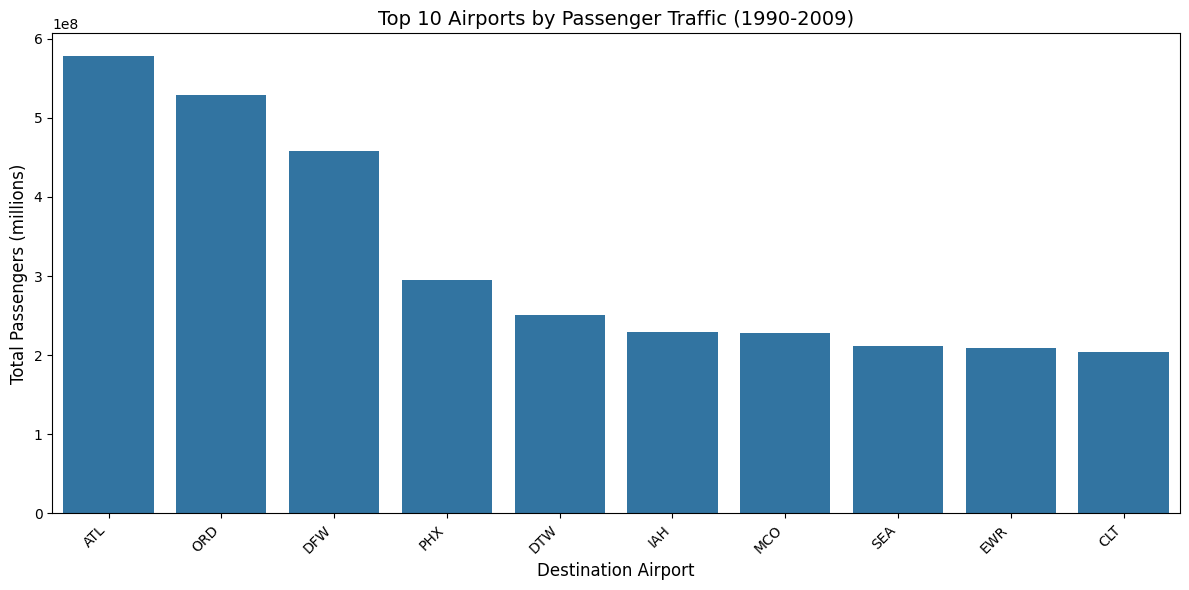

In [29]:
df_sum = df.groupby('Destination_airport')['Passengers'].sum().sort_values(ascending=False)
top_10_passengers = df_sum.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_passengers.index, y=top_10_passengers.values)

plt.xlabel('Destination Airport', fontsize=12)
plt.ylabel('Total Passengers (millions)', fontsize=12)
plt.title('Top 10 Airports by Passenger Traffic (1990-2009)', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In the above chart, I computed the most popular destinations in the United States during this time period, counting the sum of `passengers` traveling to each airport, and showing the top 10. These are some of the largest airports in the world so many are not a surprise. Even till today, Hartsfield-Jackson Atlanta International Airport (ATL) has been the largest airport in the world by passenger volume in 25 of the last 26 years, due to Delta, one of the nation's largest airlines, building their home hub there.

In [30]:
df['occupancy_rate'] = df['Passengers'] / df['Seats']

df_occupancy = df.groupby(['Origin_airport', 'Destination_airport'])['occupancy_rate'].mean().sort_values(ascending=False)
df_occupancy = df_occupancy[df.groupby(['Origin_airport', 'Destination_airport'])['occupancy_rate'].count() > 2000]
df_occupancy['flight_count'] = df.groupby(['Origin_airport', 'Destination_airport'])['occupancy_rate'].count()

top_10_occupancy = df_occupancy.head(10)
print(top_10_occupancy)


Origin_airport  Destination_airport
LAS             ORD                    0.829284
ORD             PHX                    0.788763
PHX             ORD                    0.774415
SFO             HNL                    0.773369
LAX             HNL                     0.76815
EWR             MCO                    0.767293
PHL             MCO                    0.762327
MCO             EWR                    0.754628
LAS             DFW                    0.741146
ATL             MCO                     0.73453
Name: occupancy_rate, dtype: object


In [22]:
df['occupancy_rate'] = df['Passengers'] / df['Seats']
df_occupancy = df.groupby('Origin_airport')['occupancy_rate'].mean().sort_values(ascending=False)
top_10_occupancy = df_occupancy[df.groupby('Origin_airport')['occupancy_rate'].count() > 1000].head(10)
print(top_10_occupancy)

Origin_airport
EKO    0.760731
LAS    0.744672
HNL    0.724863
SAN    0.717331
MCO    0.711657
TPA    0.707799
FLL    0.706422
SLC    0.704637
SFB    0.702626
PHX    0.702061
Name: occupancy_rate, dtype: float64


# Occupancy Analysis

In these two snippets, I have calculated the occupancy rate of flights by dividing the amount if passengers by available seats on the plane. My goal here is to determine which routes and home airport can the more consistently full flights. Full flights can be a strong indicator that the origin city is underserved by airlines. Its strong demand for traval, yet low supply of available flights can prove in which cities exist economical business oppurtunities for existing players to expand service or for new airlines to be created to serve these populations.


LAS - Las Vegas Airport exists as one side of two different route pairs if the Top 10 route with the most full flights, on average. It seems there is a strong demand for domestic travel , yet many airlines are not taking advantage of this potential. Beisdes Elko, NV (a small airport which lost half its routes in 2005), LAS has the highest average occupancy rate in the country for flights originating there. I was able to see this by grouping an 'occupancy_rate' variable I created and calculating the mean by airport.


**Let's look deeper into LAS Airport...**

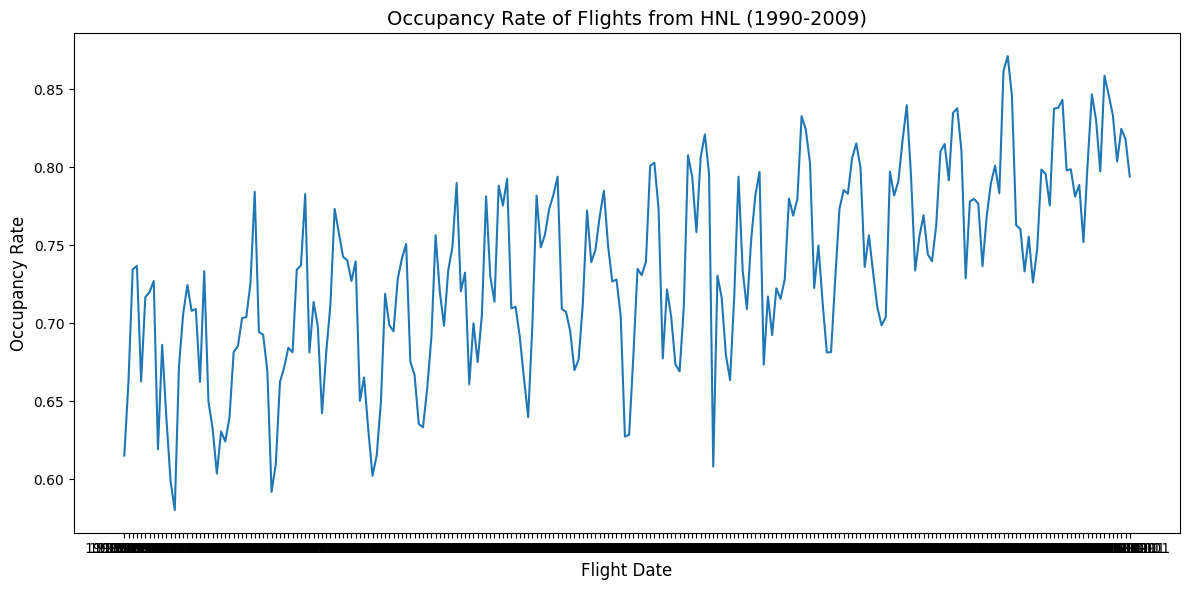

In [31]:
df['occupancy_rate'] = df['Passengers'] / df['Seats']

df_ek0 = df[df['Origin_airport'] == 'LAS']

df_ek0_occupancy = df_ek0.groupby('Fly_date')['occupancy_rate'].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_ek0_occupancy.index, df_ek0_occupancy.values)

plt.xlabel('Flight Date', fontsize=12)
plt.ylabel('Occupancy Rate', fontsize=12)
plt.title('Occupancy Rate of Flights from LAS (1990-2009)', fontsize=14)

plt.tight_layout()
plt.show()


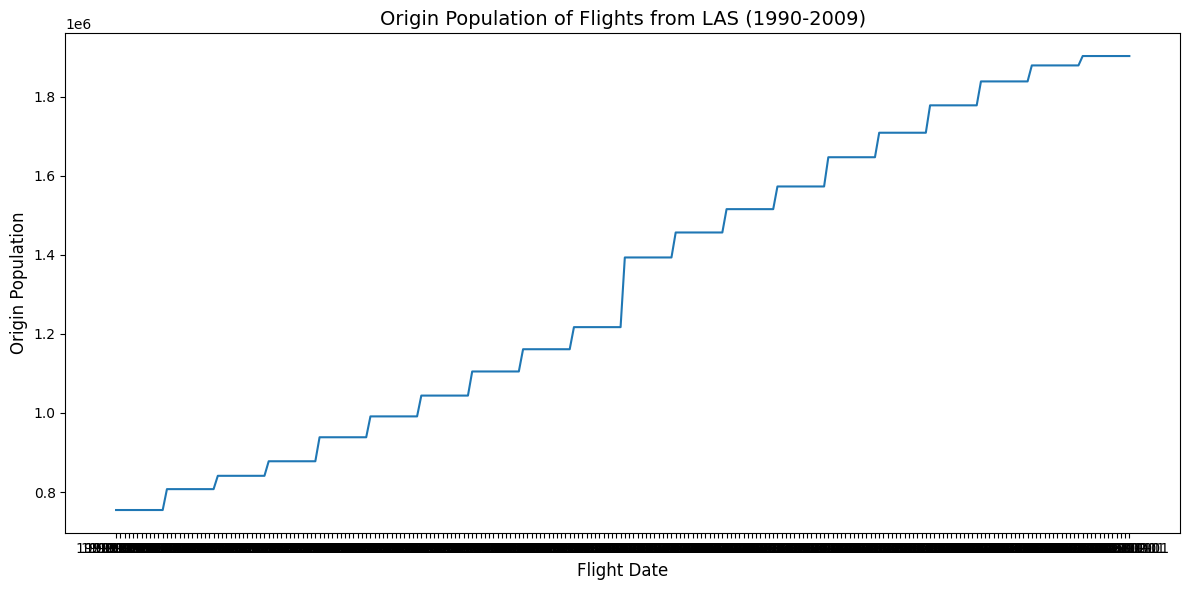

In [32]:
df_h0 = df[df['Origin_airport'] == 'LAS']

df_h0_population = df_h0.groupby('Fly_date')['Origin_population'].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_h0_population.index, df_h0_population.values)

plt.xlabel('Flight Date', fontsize=12)
plt.ylabel('Origin Population', fontsize=12)
plt.title('Origin Population of Flights from LAS (1990-2009)', fontsize=14)

plt.tight_layout()
plt.show()


## Las Vegas's Full Flights

As mentioned before, LAS Airport is serving a large population that have a very strong demand for flights. As shown in thr first graph above, LAS's occupancy rate has actually risen, on average during the time period of the data, 1990-2009, showing continously increasing demand - I wondered why?

In the next graph, I analyzed a different part of the data, population size. This data is stored for each origin and destination city at the time of its flight. Using the dates of the flights and LAS's population data, we can determin that LAS's population growth during that time period had a strong correlation on the rise in occupancy of flights leaving LAS.

Again, this information further proves that Las Vegas would be a great market for an airline to enter into.  